In [5]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Format of the file: age_gender_ethnicity_datetime
## Load and Visualize data

In [6]:
path = "UTKFace/"
files = os.listdir(path)
#la lista dei file viene caricata in modo arbitratrio, quindi la ordino per conformarla
files.sort()
size = len(files)
print("Total samples:",size) 

Total samples: 23695


In [7]:
files[0]

'100_0_0_20170112213500903.jpg.chip.jpg'

In [8]:
#Lettura e preprocessing delle immagini
#Oltre alle immagini verranno estratte anche le altre feature disponibili

images = []
ages = []
genders = []
ethnicities = [] 

IMG_WIDTH= 80
IMG_HEIGHT = 80

for file in files:
    #image = cv2.imread(path + file, cv2.IMREAD_COLOR)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.imread(path + file, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, dsize=(IMG_HEIGHT,IMG_WIDTH))
    image = image.reshape((image.shape[0],image.shape[1],1))
    #image = image.reshape((image.shape[0],image.shape[1],3))
    images.append(image)
    split_var = file.split('_')
    ages.append(int(split_var[0]))
    genders.append(int(split_var[1]))
    ethnicities.append(int(split_var[2]))
    


In [9]:
#numero di immagini presenti nel dataset
size = len(images)
size

23695

In [10]:
#shape di un'immagine
images[1].shape

(80, 80, 1)

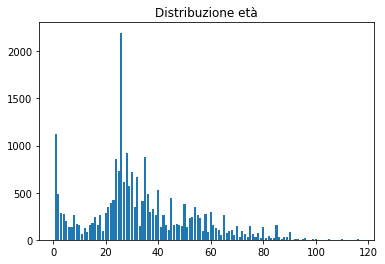

Max value: 116


In [11]:
#Grafico della distribuzione età
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.title('Distribuzione età')
plt.show()
print("Max value:",max(ages))

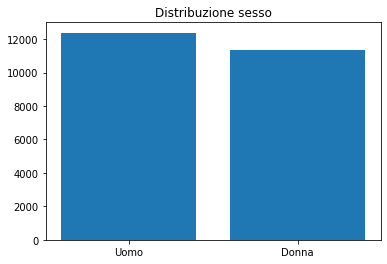

In [12]:
#Grafico della distribuzione sesso
sesso = ['Uomo','Donna']
x_genders = list(set(genders))
y_genders = [genders.count(i) for i in x_genders]
plt.bar(sesso,y_genders)
plt.title('Distribuzione sesso')
plt.show()

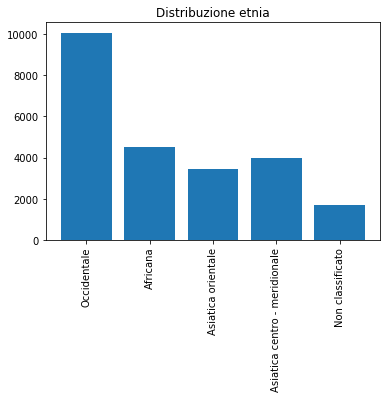

In [13]:
#Grafico della distribuzione etinia
etnia = ['Occidentale','Africana','Asiatica orientale','Asiatica centro - meridionale', 'Non classificato']
x_ethnicities = list(set(ethnicities))
y_ethnicities = [ethnicities.count(i) for i in x_ethnicities]
plt.bar(etnia,y_ethnicities)
plt.xticks(rotation = 90)
plt.title('Distribuzione etnia')
plt.show()

Age: 100
Gender: 0
Ethnicity: 0


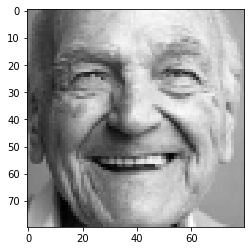

In [14]:
#funzione per lo show di un'immagine. 
def display(img):
    img = np.squeeze(img)  #squeeze remove single-dimensional entries from the shape of an array.
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.show()

idx = 1
sample = images[idx]
print("Age:",ages[idx])
print("Gender:",genders[idx])
print("Ethnicity:",ethnicities[idx])
display(images[idx])

In [15]:
#Creazione di un'unica lista contenente le feature associate alle immagini

features = []

for i in range(size):
    
    featElement = np.array([int(genders[i]),int(ethnicities[i])])
    #featElement = np.array([int(genders[i])])
    features.append(featElement)

features = np.asarray(features)

In [16]:
#Normalizzazione delle immagini
if 'target' not in locals():
    target = ages
    images = np.array(images)
    images = images / 255

type(images)

numpy.ndarray

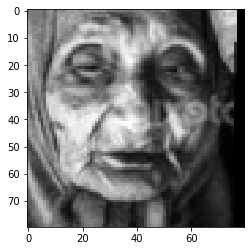

Name: 100_1_2_20170112222336458.jpg.chip.jpg
Age: 100
Sex: 1
Ethnicity: 2


In [17]:
#Altro esempio
idx=10
display(images[idx])
print("Name:",files[idx])
print("Age:",target[idx])
print("Sex:",features[idx][0])
print("Ethnicity:",features[idx][1])

In [18]:
#split dei dati
#oltre ai soliti primi 4 parametri, inserisco name_train e name_test per inserire i nomi dei file per poterli dividere in cartelle
images_train, images_test, feat_train, feat_test, y_train, y_test, fileName_train, fileName_test = train_test_split(images, features, target, files, test_size=0.2,random_state=42,shuffle=True)
print("Samples in Training:",images_train.shape[0])
print("Samples in Testing:",images_test.shape[0])


Samples in Training: 18956
Samples in Testing: 4739


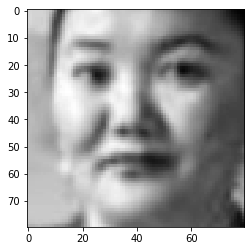

36
[1 2]
36_1_2_20170109134229652.jpg.chip.jpg


In [19]:
#Da togliere
idx=1
display(images_train[idx])
print(y_train[idx])
print(feat_train[idx])
print(fileName_train[idx])

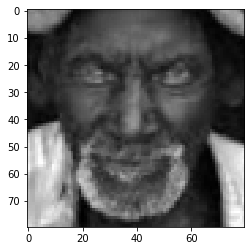

89
[0 1]
89_0_1_20170117193440263.jpg.chip.jpg


In [20]:
#Da togliere
idx=1009
display(images_test[idx])
print(y_test[idx])
print(feat_test[idx])
print(fileName_test[idx])

In [21]:
from pathlib import Path
import shutil
from collections import Counter

#controllo se le cartelle test e training sono già presenti
print("Cartella training?",os.path.isdir("training"))
print("Cartella test?",os.path.isdir("test"))


#controllo se i dati sono già presenti nelle cartelle (non è la prima esecuzione del codice)
firstExec = True
#DA MIGLIORARE EFFICIENZA
if((os.path.isdir("training")) and (os.path.isdir("test"))):
    trElements = os.listdir("training/")
    teElements = os.listdir("test/")
    if((Counter(fileName_train) == Counter(trElements)) and (Counter(fileName_test) == Counter(teElements))):
        firstExec = False

print("Prima esecuzione?",firstExec)

Cartella training? True
Cartella test? True
Prima esecuzione? False


In [22]:
#se è la prima esecuzione creo le cartelle e vi inserisco i file        
if(firstExec):
    #creo la cartella dove inserire le immagini di training
    Path("training").mkdir(parents=True, exist_ok=True)
    
    #copio le immagini di training
    for i in range(0,images_train.shape[0]):
        shutil.copy(path+fileName_train[i],"training/"+fileName_train[i])
    trElements = os.listdir("training/")
    #print(set(name_train).symmetric_difference(set(trElements)))
    assert Counter(fileName_train) == Counter(trElements),set(fileName_train).symmetric_difference(set(trElements))
    
    #creo la cartella dove inserire le immagini di test
    Path("test").mkdir(parents=True, exist_ok=True)
    #copio le immagini di test
    for i in range(0,images_test.shape[0]):
        shutil.copy(path+fileName_test[i],"test/"+fileName_test[i])
    teElements = os.listdir("test/")
    assert Counter(fileName_test) == Counter(teElements),set(fileName_test).symmetric_difference(set(teElements))
    

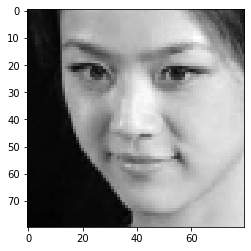

27
27_1_2_20170116173140813.jpg.chip.jpg


In [23]:
#Da togliere
idx=50
display(images_train[idx])
print(y_train[idx])
print(fileName_train[idx])

## Build Model

In [24]:
#Funzione per la creazione di un modello

import keras 
import tensorflow as tf
from keras.layers import *
from keras.models import *
from IPython.display import Image
from keras import backend as K


def create_cnn_model():

    #inputs = Input(shape=(IMG_HEIGHT,IMG_WIDTH,3))
    inputs = Input(shape=(IMG_HEIGHT,IMG_WIDTH,1))
    conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
    conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
    #x = MaxPooling2D(pool_size=(2, 2))(conv3)
    x = Dropout(0.15)(pool2)
        
    # flatten the volume, then FC => RELU => BN => DROPOUT
    x = Flatten()(x)
    
    #shape degli attributi numerici
    #featureShape = Input(shape=(2,))
    #featureShape = Input(shape=(1,))
    #x = keras.layers.Concatenate(axis=1)([x, featureShape])
    
    #dropout = Dropout(0.15)
    age_model = Dense(128, activation='relu')(x)
    #age_model = dropout(age_model)
    age_model = Dense(64, activation='relu')(age_model)
    #age_model = dropout(age_model)
    age_model = Dense(32, activation='relu')(age_model)
    #age_model = dropout(age_model)
    age_model = Dense(1, activation='relu')(age_model)
   
        
    # construct the CNN
    #model = Model([inputs, featureShape], age_model)
    model = Model(inputs, age_model)
    #model.compile(loss="mse", optimizer='adam', metrics=['accuracy'])
    model.compile(optimizer = 'adam', loss ='mae', metrics =['accuracy'])
    #tf.keras.utils.plot_model(model, 'model.png',show_shapes=True)  
   
    # return the CNN
    return model        
        
    

Using TensorFlow backend.


In [25]:
#istanziamo un modello chiamando la funzione sopra definita
model = create_cnn_model()

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80, 80, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 78, 78, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 76, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 128)       0   

In [ ]:
# train the model
#batch_size = [128] dimensione del batch size utilizzata
#nb_epoch = [25, 40, 80, 100, 200, 500] numero di epoche utilizzate nelle varie prove

batch_size = [128]
nb_epoch = [80]
history_list = []
best_model= None
best_model = create_cnn_model()
#hist_best_model = best_model.fit(x = [images_train, feat_train], y = y_train, epochs = 1, batch_size = 250, validation_split=0.1, shuffle=True)
hist_best_model = best_model.fit(x = images_train, y = y_train, epochs = 1, batch_size = 250, validation_split=0.1, shuffle=True)
#hist_best_model = best_model.fit(x = images_train, y = y_train, epochs = 1, batch_size = 250, validation_data= (images_test, y_test), shuffle=True)
    
for batch in batch_size:
    for epoch in nb_epoch:
            print('epoch:',epoch,'batch:',batch)
            model = None
            model = create_cnn_model()
            #hist_model = model.fit(x = [images_train, feat_train], y = y_train, epochs = epoch, batch_size = batch, validation_split=0.1, shuffle=True)
            hist_model = model.fit(x = images_train, y = y_train, epochs = epoch, batch_size = batch, validation_split=0.1, shuffle=True)
            #hist_model = model.fit(x = images_train, y = y_train, epochs = epoch, batch_size = batch, validation_data= (images_test, y_test), shuffle=True)
            history_list.append(hist_model.history)
            
            mod_loss = np.mean(hist_model.history['loss'])
            mod_val_loss = np.mean(hist_model.history['val_loss'])
            mod_accuracy = np.mean(hist_model.history['accuracy'])
            best_mod_loss = np.mean(hist_best_model.history['loss'])
            print(mod_loss, best_mod_loss)
            
            if (mod_loss < best_mod_loss):
                best_model = model
                hist_best_model = hist_model
                
model_path = "img_80_0.15_3CL_0.01"
Path("Modelli/"+model_path).mkdir(parents=True, exist_ok=True)
best_model.save('Modelli/'+model_path+"/"+model_path+".h5")

In [ ]:
# summarize history for loss
plt.plot(hist_best_model.history['loss'])
plt.plot(hist_best_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("Modelli/"+model_path+"/"+"model loss")
plt.show()

# summarize history for accuracy
plt.plot(hist_best_model.history['accuracy'])
plt.plot(hist_best_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("Modelli/"+model_path+"/"+"model accuracy")
plt.show()


#y = np.reshape(feat_test,(1,))
y_prova = np.asarray(y_test)
#result_evaluate = best_model.evaluate([images_test, feat_test], y_prova)
result_evaluate = best_model.evaluate(images_test, y_test)


#Salvataggio informazioni modello
f= open("Modelli/"+model_path+"/result.txt","w+")
f.write("Train loss: "+ str(mod_loss)+"\n")
f.write("val_loss: " + str(mod_val_loss)+"\n")
f.write("Train accuracy: "+ str(mod_accuracy)+"\n")
f.write("Test loss: "+str(result_evaluate[0])+"\n")
f.write("Test accuracy: "+str(result_evaluate[1])+"\n")
f.close()
tf.keras.utils.plot_model(best_model, "Modelli/"+model_path+"/model.png",show_shapes=True) 
np.save("Modelli/"+model_path+"/hist.npy",hist_best_model)

#caricare history di un modello
hist_prova = np.load("Modelli/"+model_path+"/hist.npy",allow_pickle = True).item()

# Valutazioni

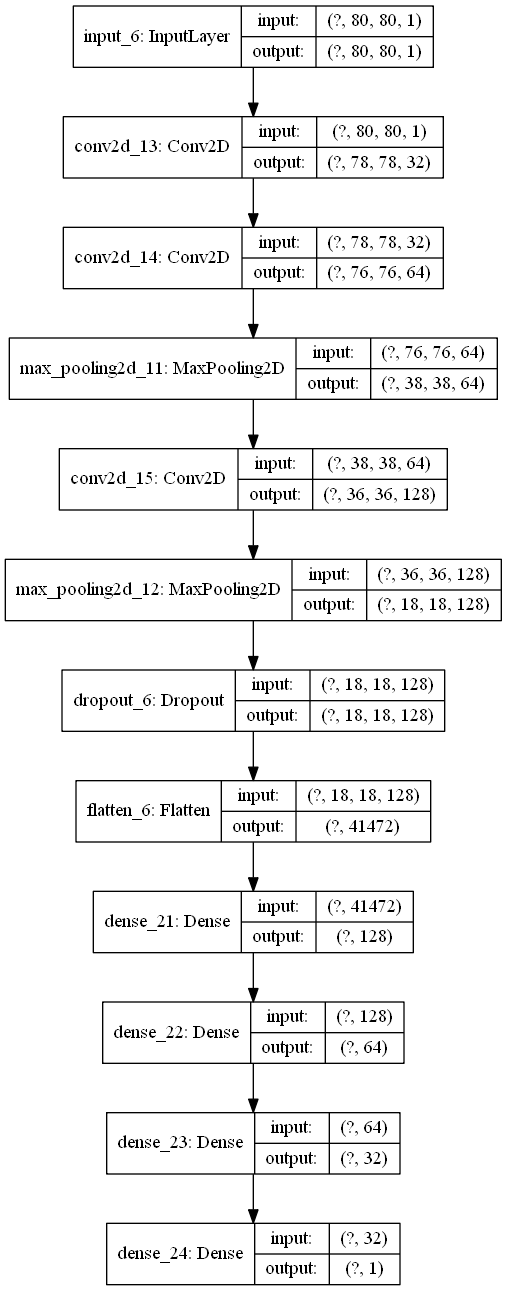

In [26]:
#carichiamo uno dei modelli precedentemente addestrati
loaded_model= tf.keras.models.load_model("img_200_0.15_3CL_0.2.h5")

#Struttura del modello utilizzato
Image("model.png")

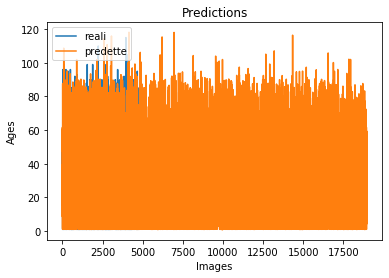

In [37]:
predictions_age1 = loaded_model.predict(images_test)
plt.plot(y_test)
plt.plot(predictions_age)
plt.title('Predictions')
plt.ylabel('Ages')
plt.xlabel('Images')
plt.legend(['reali', 'predette'], loc='upper left')

plt.show()

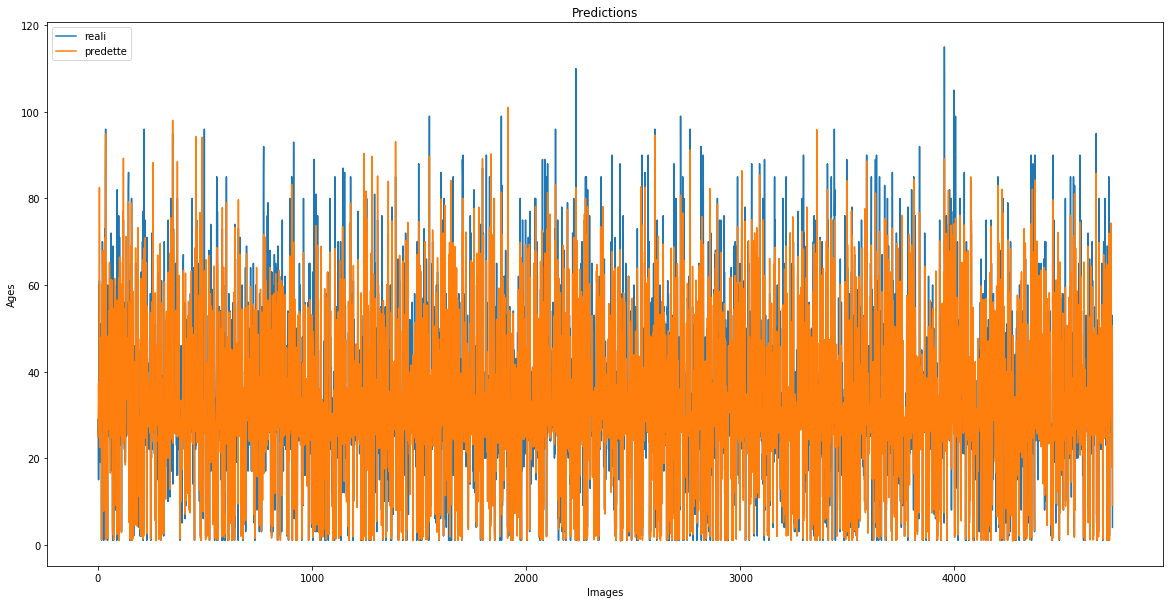

In [29]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
plt.plot(y_test)
plt.plot(predictions_age)
plt.title('Predictions')
plt.ylabel('Ages')
plt.xlabel('Images')
plt.legend(['reali', 'predette'], loc='upper left')

plt.show()

[2.15565872 1.25955582 2.21918488 ... 2.45620728 5.49397278 5.08390236]
49.2286262512207
(array([ 734, 1009, 1638, 2015, 2166, 2570]),)
5.51857614934784


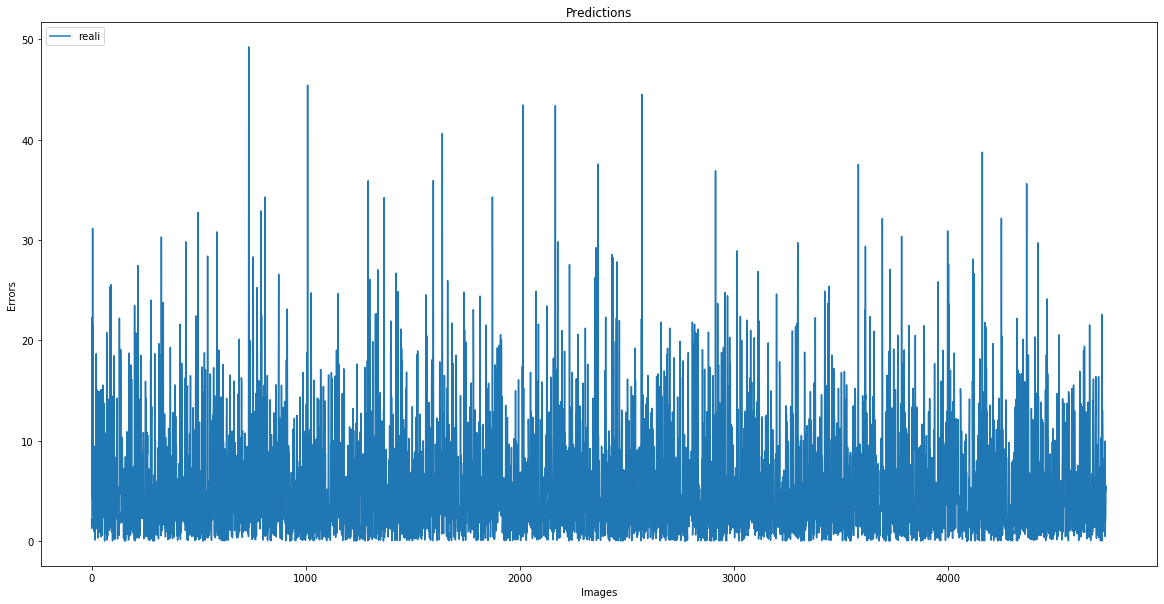

In [45]:
#Differenza assoluta tra volori reali e valori predetti.
predictions_age1 = np.squeeze(predictions_age1)
dist = abs(y_test - predictions_age1)
print(dist)
print(np.amax(dist))
#print(np.where(dist == np.amax(dist)))
print(np.where(dist >= 40))
print(np.mean(dist))

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
plt.plot(dist)
plt.title('Predictions')
plt.ylabel('Errors')
plt.xlabel('Images')
plt.legend(['reali', 'predette'], loc='upper left')

plt.show()

In [31]:
predictions_age = loaded_model.predict(images_train)

[ 0.2693634   0.85379791  0.81377792 ...  2.24266815 11.82721329
  4.55292273]
52.45317459106445
(array([17897, 18392, 18663]),)
1.074663702506233


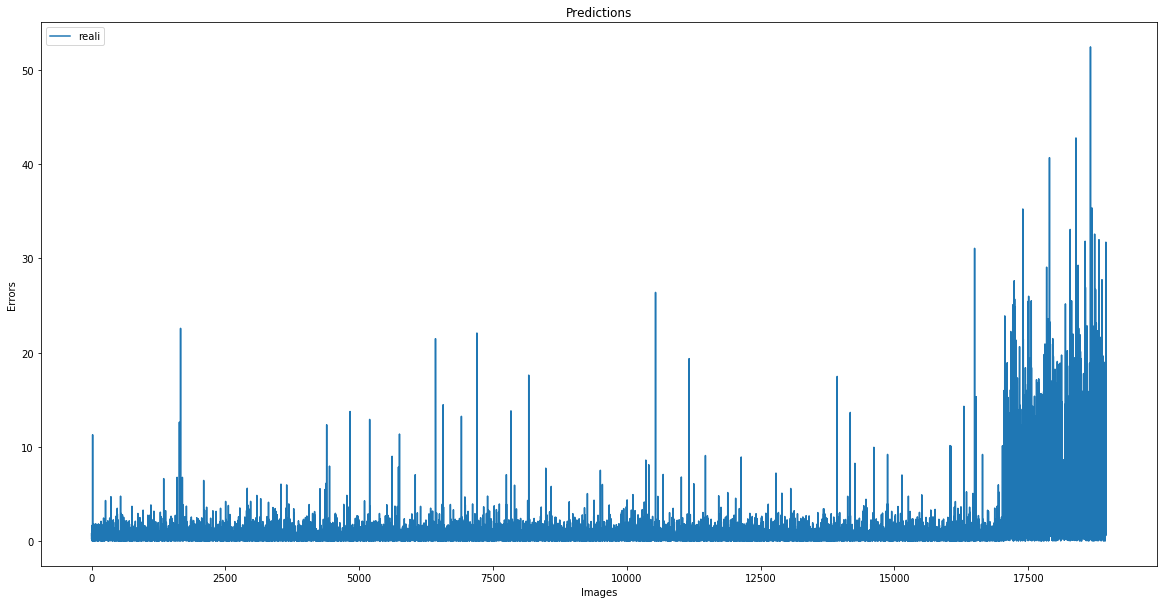

In [33]:
#Differenza assoluta tra volori reali e valori predetti.

predictions_age = np.squeeze(predictions_age)
dist = abs(y_train - predictions_age)
print(dist)
print(np.amax(dist))
#print(np.where(dist == np.amax(dist)))
print(np.where(dist >= 40))
print(np.mean(dist))

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
plt.plot(dist)
plt.title('Predictions')
plt.ylabel('Errors')
plt.xlabel('Images')
plt.legend(['reali', 'predette'], loc='upper left')

plt.show()

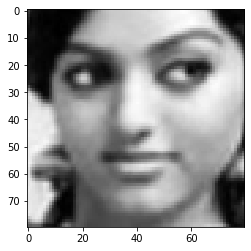

25
[1 3]
25_1_3_20170117151149187.jpg.chip.jpg
23.216206


In [63]:
idx=17244
display(images_train[idx])
print(y_train[idx])
print(feat_train[idx])
print(fileName_train[idx])
print(predictions_age[idx])

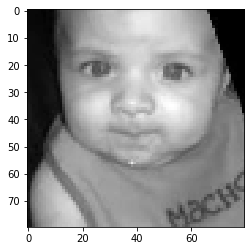

1
[0 4]
1_0_4_20161221202127697.jpg.chip.jpg
41.601936


In [48]:
idx=1638
display(images_test[idx])
print(y_test[idx])
print(feat_test[idx])
print(fileName_test[idx])
print(predictions_age1[idx])

In [ ]:
y_prova = np.asarray(y_test)
loaded_model.evaluate(images_test, y_prova)

##### fileName_test

## GridSearchCV

In [ ]:
best_parameters = grid_search.best_params_
best_parameters

## K-FOLD VALIDATION